In [1]:
!pip install yfinance tensorflow pandas numpy matplotlib scikit-learn

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0445 - val_loss: 2.8660e-04
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0017 - val_loss: 2.4552e-04
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 0.0018 - val_loss: 4.3234e-04
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0015 - val_loss: 2.3249e-04
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0012 - val_loss: 2.2368e-04
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0010 - val_loss: 5.0192e-04
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0011 - val_loss: 4.7891e-04
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0011 - val_loss: 2.4642e-04
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 9.4275e-04 - val_loss: 2.0342e-04
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 8.5931e-04 - val_loss: 2.8173e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


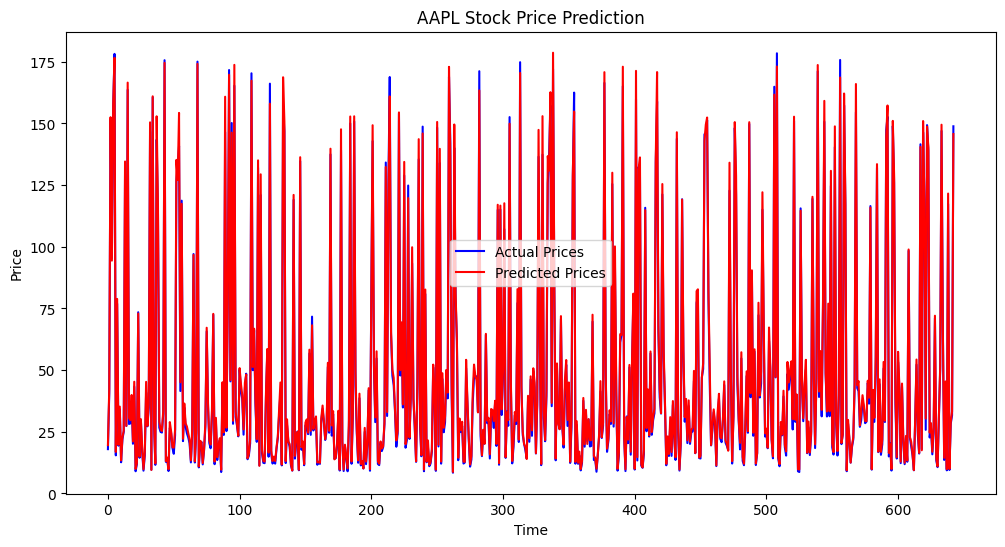

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# Fetch historical stock data using yfinance
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

# Preprocessing the data
def preprocess_data(data, look_back=60):
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    # Create datasets
    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i-look_back:i, 0])  # Last 'look_back' days
        y.append(scaled_data[i, 0])             # Next day's price
    return np.array(X), np.array(y), scaler

# Build the LSTM-based ANN model
def build_ann(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(input_shape, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Plot results
def plot_predictions(actual, predicted, title="Stock Price Prediction"):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, color="blue", label="Actual Prices")
    plt.plot(predicted, color="red", label="Predicted Prices")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# Main program
if __name__ == "__main__":
    # Fetch stock data
    ticker = "AAPL"  # Example: Apple stock
    start_date = "2010-01-01"
    end_date = "2023-01-01"
    stock_data = fetch_stock_data(ticker, start_date, end_date)

    # Preprocess data
    look_back = 60
    X, y, scaler = preprocess_data(stock_data, look_back)
    X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build and train the model
    model = build_ann(X_train.shape[1])
    model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)  # Reverse normalization
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot predictions
    plot_predictions(actual, predictions, title=f"{ticker} Stock Price Prediction")


In [ ]:
Concept: Predicting Stock Market Trends Using an Artificial Neural Network (ANN)
Stock market prediction using ANN involves training a neural network on historical stock data (e.g., prices, volume) to predict future trends or prices. This is done by treating stock market prediction as a supervised learning task, where:

Inputs: Features like historical prices, moving averages, RSI, or other indicators.
Outputs: Next day's price or trend (up/down).
We'll implement this in Python using TensorFlow/Keras for ANN construction and training.


Explanation of Functions and Workflow
fetch_stock_data:

Uses yfinance to download historical stock prices (e.g., Close price).
Input: Ticker symbol, start date, and end date.
Output: Close prices as a Pandas Series.
preprocess_data:

Normalizes the data using MinMaxScaler to scale values between 0 and 1.
Creates input-output pairs for supervised learning with a look_back window.
build_ann:

Constructs a neural network with LSTM layers to handle sequential data.
Includes Dropout layers to reduce overfitting.
Uses adam optimizer and mean_squared_error as the loss function.
Model Training:

Trains the model on the training set for 50 epochs with a batch size of 32.
Uses validation data to monitor performance during training.
Predictions:

Predictions are scaled back to original values using the inverse of MinMaxScaler.
The results are plotted for visual comparison of actual vs. predicted stock prices.
Output
Training Log: Shows loss values for each epoch.
Prediction Graph: A graph showing how closely the predicted values follow the actual stock prices.
This program demonstrates how to combine real-time stock data from yfinance with LSTM-based ANN to predict stock prices or trends effectively. You can customize this for different stocks or include more features like moving averages or trading volumes.
